In [85]:
import pandas as pd

df = pd.read_csv('CombinedBeansPrice.csv')
# carrot = pd.read_csv('CombinedCarrotPrice.csv')

In [86]:
df.shape

(1809, 13)

In [87]:
df.isnull().sum()


Date                  0
Item                  0
Pettah              502
Kandy                 9
Dambulla             11
Meegoda             121
Norochchole        1809
Thambuththegama     167
Keppetipola         549
Nuwaraeliya        1329
Bandarawela        1587
Peliyagoda         1348
Veyangoda          1402
dtype: int64

In [88]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_dropped = df.dropna(thresh=threshold, axis=1)

# Display the columns that remain after dropping
df_dropped.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             1809 non-null   object
 1   Item             1809 non-null   object
 2   Pettah           1307 non-null   object
 3   Kandy            1800 non-null   object
 4   Dambulla         1798 non-null   object
 5   Meegoda          1688 non-null   object
 6   Thambuththegama  1642 non-null   object
 7   Keppetipola      1260 non-null   object
dtypes: object(8)
memory usage: 113.2+ KB


In [89]:
df_dropped.isnull().sum()

Date                 0
Item                 0
Pettah             502
Kandy                9
Dambulla            11
Meegoda            121
Thambuththegama    167
Keppetipola        549
dtype: int64

In [90]:
import pandas as pd
import numpy as np

# Function to convert price ranges to their average value
def convert_price_range(price_range):
    if pd.isna(price_range):
        return np.nan
    try:
        # Split the price range by hyphens and filter out any empty strings
        prices = [float(price) for price in price_range.split('-') if price]
        # Calculate the average of the two prices
        return sum(prices) / len(prices)
    except:
        return np.nan

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_dropped = df.dropna(thresh=threshold, axis=1)

# Apply the conversion function to the relevant columns
for column in ['Pettah', 'Kandy', 'Dambulla', 'Meegoda', 'Thambuththegama', 'Keppetipola']:
    df_dropped[column] = df_dropped[column].apply(convert_price_range)

# Convert the Date column to datetime
df_dropped['Date'] = pd.to_datetime(df_dropped['Date'])

# Set the Date column as the index
df_dropped.set_index('Date', inplace=True)

# Display the dataframe after conversion
df_dropped.head()



/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73625/2807792457.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[column] = df_dropped[column].apply(convert_price_range)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73625/2807792457.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Date'] = pd.to_datetime(df_dropped['Date'])


,Item,Pettah,Kandy,Dambulla,Meegoda,Thambuththegama,Keppetipola
Date,,,,,,,
2016-01-02,Beans,125.0,125.0,120.0,162.5,NaN,NaN
2016-01-03,Beans,115.0,125.0,90.0,110.0,110.0,NaN
2016-01-04,Beans,55.0,45.0,65.0,82.5,57.5,NaN
2016-01-06,Beans,175.0,155.0,180.0,215.0,190.0,NaN
2016-01-07,Beans,145.0,125.0,125.0,172.5,NaN,NaN


In [91]:
df_dropped.isnull().sum()

Item                 0
Pettah             502
Kandy               11
Dambulla            13
Meegoda            121
Thambuththegama    167
Keppetipola        549
dtype: int64

In [92]:
# from statsmodels.tsa.seasonal import seasonal_decompose
   
# decomposition = seasonal_decompose(df_dropped['Thambuththegama'], model='additive', period=12)
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid
# trend_filled = trend.fillna(method='bfill').fillna(method='ffill')
# seasonal_filled = seasonal.fillna(method='bfill').fillna(method='ffill')

# # Combine the trend and seasonal components to impute the original series
# imputed_series = trend_filled + seasonal_filled + residual.fillna(0)
# df_dropped['Thambuththegama'] = imputed_series

In [93]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Function to impute missing values using trend and seasonal decomposition
# def impute_missing_values(series):

    
#     decomposition = seasonal_decompose(series, model='additive', period=12)
#     trend = decomposition.trend
#     seasonal = decomposition.seasonal
#     residual = decomposition.resid

#     # Fill missing values in trend and seasonal components
#     trend_filled = trend.fillna(method='bfill').fillna(method='ffill')
#     seasonal_filled = seasonal.fillna(method='bfill').fillna(method='ffill')

#     # Combine the trend and seasonal components to impute the original series
#     imputed_series = trend_filled + seasonal_filled + residual.fillna(0)

#     return imputed_series

# # Apply forward fill for specific columns and impute for others
# columns_with_forward_fill = ['Kandy', 'Dambulla']

# for column in df_dropped.columns:
#     if df_dropped[column].isnull().sum() > 0:
#         if column in columns_with_forward_fill:
#             df_dropped[column].fillna(method='ffill', inplace=True)
#         else:
#             df_dropped[column] = impute_missing_values(df_dropped[column])

# # Reset the index
# df_dropped.reset_index(inplace=True)

# # Save the cleaned and imputed DataFrame to a new CSV file
# df_dropped.to_csv('ImputedBeansPrice.csv', index=False)

In [94]:
# Forward fill for specific columns
columns_with_forward_fill = ['Kandy', 'Dambulla']

for column in columns_with_forward_fill:
    df_dropped[column].fillna(method='ffill', inplace=True)

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73625/3008278259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped[column].fillna(method='ffill', inplace=True)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73625/3008278259.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dropped[column].fillna(method='ffill', inplace=True)
/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73625/3008278259

/var/folders/xz/zslq9hk108nbjz1zz8tsnff80000gn/T/ipykernel_73625/531626321.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_kandy_dambulla.fillna(method='ffill', inplace=True)


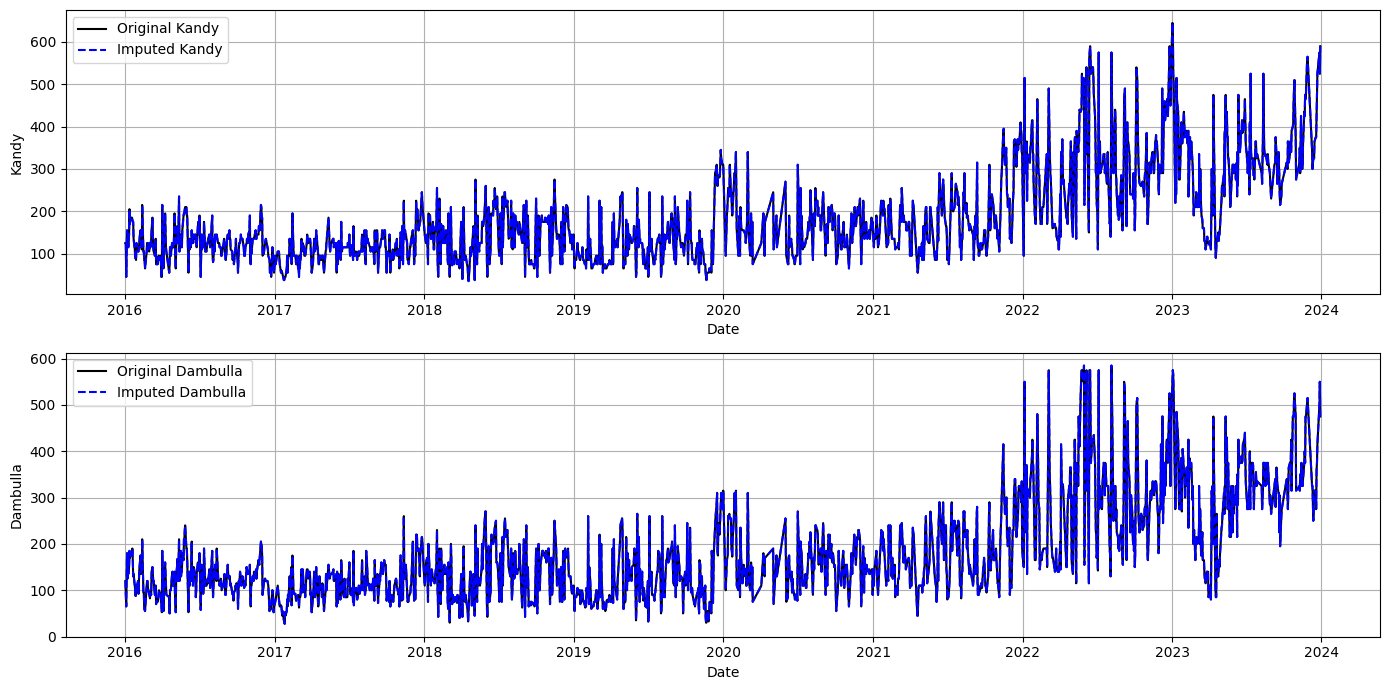

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_dropped is already loaded and the 'Date' column is set as the index

# Create a new DataFrame with the 'Kandy' and 'Dambulla' columns
df_kandy_dambulla = df_dropped[['Kandy', 'Dambulla']].copy()

# Forward fill missing values in 'Kandy' and 'Dambulla'
df_kandy_dambulla.fillna(method='ffill', inplace=True)

# Reset the index
df_kandy_dambulla.reset_index(inplace=True)

# Plot the original and imputed values
plt.figure(figsize=(14, 7))

# Plot for 'Kandy'
plt.subplot(2, 1, 1)
plt.plot(df_kandy_dambulla['Date'], df_dropped.reset_index()['Kandy'], color='black', label='Original Kandy')
plt.plot(df_kandy_dambulla['Date'], df_kandy_dambulla['Kandy'], color='blue', linestyle='--', label='Imputed Kandy')


plt.xlabel('Date')
plt.ylabel('Kandy')
plt.legend()
plt.grid(True)

# Plot for 'Dambulla'
plt.subplot(2, 1, 2)
plt.plot(df_kandy_dambulla['Date'], df_dropped.reset_index()['Dambulla'], color='black', label='Original Dambulla')
plt.plot(df_kandy_dambulla['Date'], df_kandy_dambulla['Dambulla'], color='blue', linestyle='--', label='Imputed Dambulla')


plt.xlabel('Date')
plt.ylabel('Dambulla')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


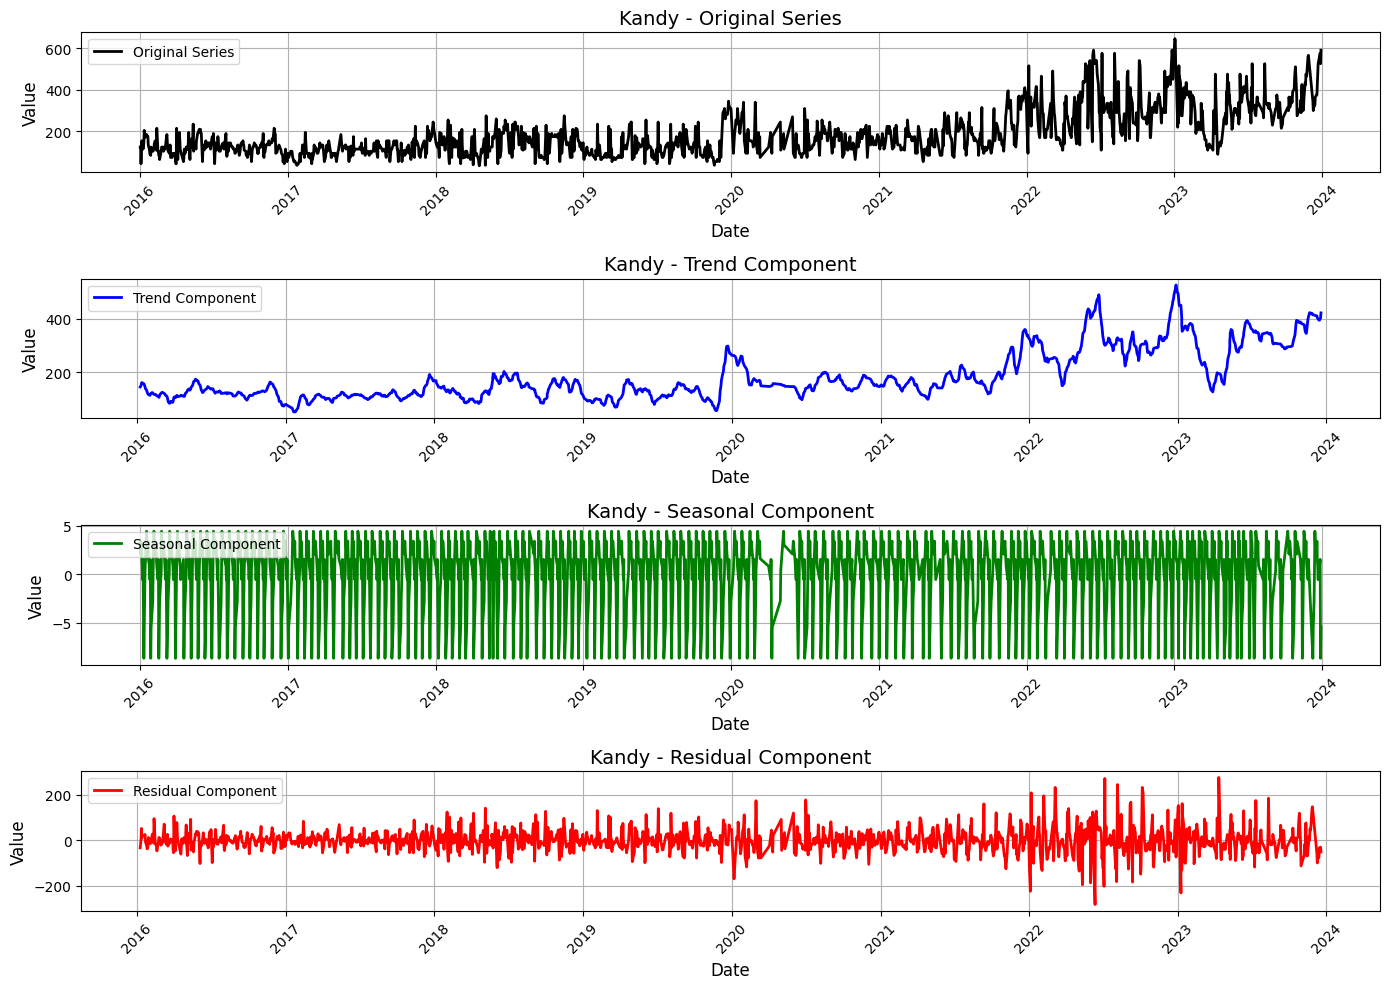

In [117]:
# Create a new DataFrame with 'Kandy' column and 'Date' index
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
series_kandy = df_kandy_dambulla.set_index('Date')['Kandy']

# Function to plot decomposition with x-axis in years
def plot_decomposition(series, column_name):
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(series, model='additive', period=12)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting
    plt.figure(figsize=(14, 10))

    # Original Series
    plt.subplot(4, 1, 1)
    plt.plot(series.index, series, color='black', linewidth=2, label='Original Series')
    plt.title(f'{column_name} - Original Series', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)

    # Trend Component
    plt.subplot(4, 1, 2)
    plt.plot(trend.index, trend, color='blue', linewidth=2, label='Trend Component')
    plt.title(f'{column_name} - Trend Component', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)

    # Seasonal Component
    plt.subplot(4, 1, 3)
    plt.plot(seasonal.index, seasonal, color='green', linewidth=2, label='Seasonal Component')
    plt.title(f'{column_name} - Seasonal Component', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)

    # Residual Component
    plt.subplot(4, 1, 4)
    plt.plot(residual.index, residual, color='red', linewidth=2, label='Residual Component')
    plt.title(f'{column_name} - Residual Component', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Plot decomposition for 'Kandy'
plot_decomposition(series_kandy, 'Kandy')


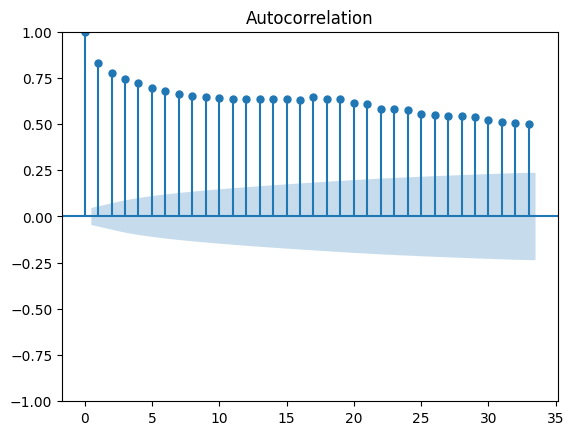

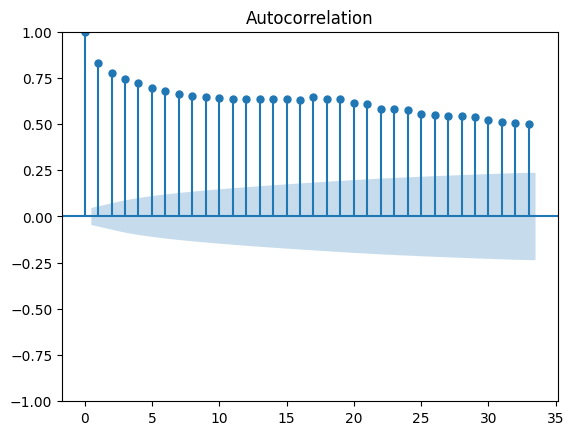

In [119]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series_kandy)

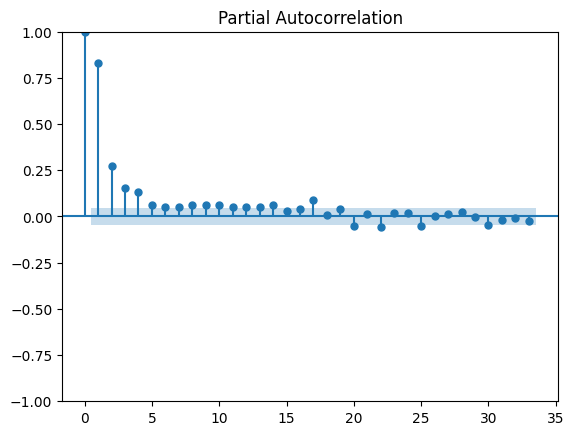

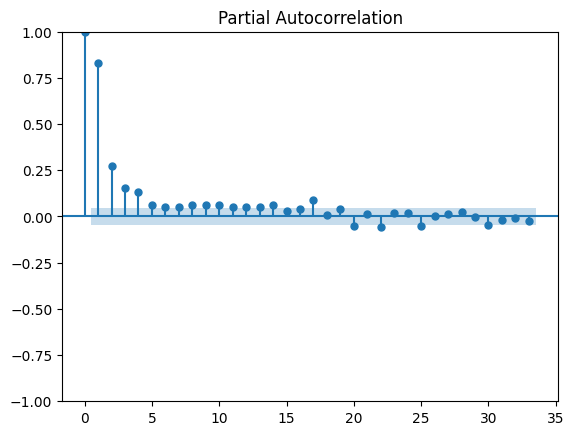

In [120]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series_kandy)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
23:29:55 - cmdstanpy - INFO - Chain [1] start processing
23:29:55 - cmdstanpy - INFO - Chain [1] done processing


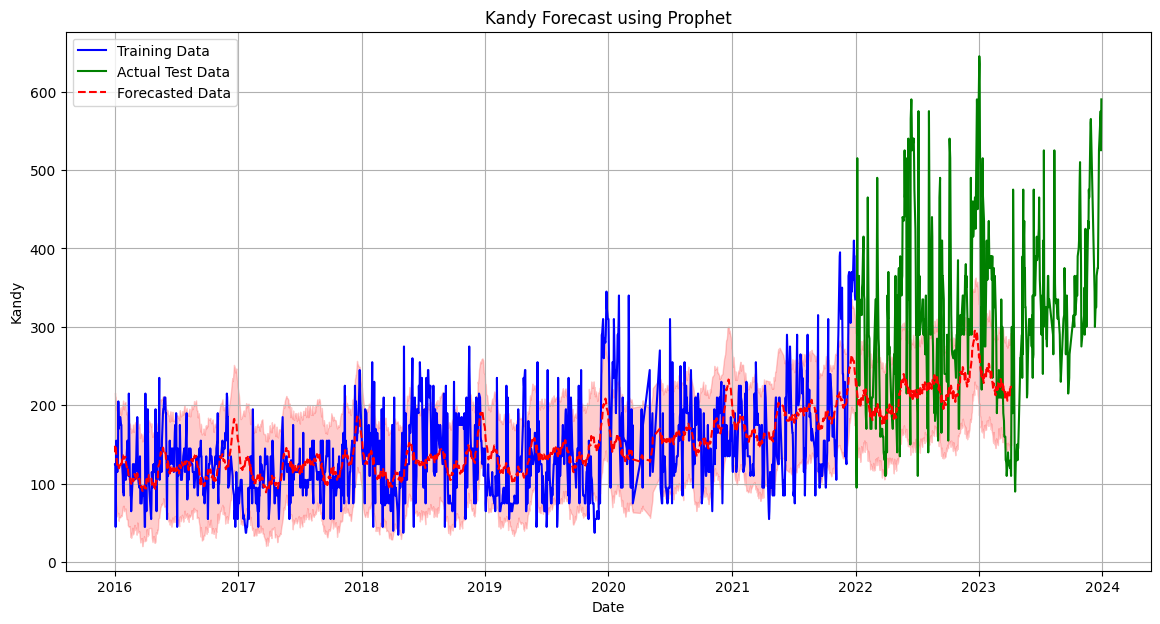

KeyError: '[1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808] not in index'

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Ensure 'Date' is in datetime format and rename columns for Prophet
df_kandy_dambulla['Date'] = pd.to_datetime(df_kandy_dambulla['Date'])
df_prophet = df_kandy_dambulla[['Date', 'Kandy']].rename(columns={'Date': 'ds', 'Kandy': 'y'})

# Split the data into training and test sets
split_date = '2023-01-01'  # Adjust this date based on your data
train = df_prophet[df_prophet['ds'] < split_date]
test = df_prophet[df_prophet['ds'] >= split_date]

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(train)

# Create a DataFrame for future dates to forecast
future = model.make_future_dataframe(periods=len(test), freq='D')

# Forecast
forecast = model.predict(future)

# Merge the forecast with the actual test data
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(test, on='ds', how='left')

# Plot the forecast
plt.figure(figsize=(14, 7))

# Plot the training data
plt.plot(train['ds'], train['y'], color='blue', label='Training Data')

# Plot the actual test data
plt.plot(test['ds'], test['y'], color='green', label='Actual Test Data')

# Plot the forecasted data
plt.plot(forecast['ds'], forecast['yhat'], color='red', linestyle='--', label='Forecasted Data')

# Plot the forecast uncertainty intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Kandy')
plt.title('Kandy Forecast using Prophet')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the Mean Squared Error
mse = mean_squared_error(test['y'], forecast.loc[test.index, 'yhat'])
print(f'Mean Squared Error: {mse}')
